# Ensemble array

An ensemble array is a group of ensembles
that each represent a part of the overall signal.

Ensemble arrays are similar to normal ensembles,
but expose a slightly different interface.
Additionally, in an ensemble array,
the components of the overall signal are not related.
As a result, network arrays cannot be used
to compute nonlinear functions that mix the dimensions they represent.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

In [2]:
model = nengo.Network(label="Ensemble Array")
with model:
    # Make an input node
    sin = nengo.Node(output=lambda t: [np.cos(t), np.sin(t)])

    # Make ensembles to connect
    A = nengo.networks.EnsembleArray(100, n_ensembles=2)
    B = nengo.Ensemble(100, dimensions=2)
    C = nengo.networks.EnsembleArray(100, n_ensembles=2)

    # Connect the model elements, just feedforward
    nengo.Connection(sin, A.input)
    nengo.Connection(A.output, B)
    nengo.Connection(B, C.input)

    # Setup the probes for plotting
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A.output, synapse=0.02)
    B_probe = nengo.Probe(B, synapse=0.02)
    C_probe = nengo.Probe(C.output, synapse=0.02)

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(10)

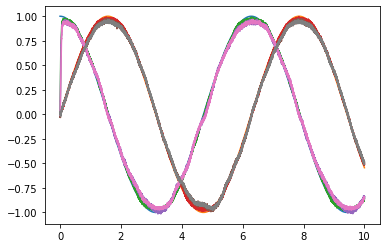

In [4]:
# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[sin_probe])
plt.plot(sim.trange(), sim.data[A_probe])
plt.plot(sim.trange(), sim.data[B_probe])
plt.plot(sim.trange(), sim.data[C_probe])

These plots demonstrate that the ensemble array
works very similarly to a standard N-dimensional population.
However, this is not true when it comes to computing functions.
Ensemble arrays cannot be used
to compute nonlinear functions that mix the dimensions they represent.